# Data Classification
___

By : Fatema 

### 1) Importing Libraries

here we are importing needed libraries

In [136]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , f_classif ,SelectKBest

### 2) Reading Data

In [3]:
data = pd.read_csv("pd_speech_features.csv")
data.shape

(756, 755)

In [4]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


### 3) Data Analysis

In [6]:
data[['id','gender','PPE','DFA']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      756 non-null    int64  
 1   gender  756 non-null    int64  
 2   PPE     756 non-null    float64
 3   DFA     756 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 23.8 KB


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(4), object(2)
memory usage: 4.4+ MB


In [11]:
data[data.columns[:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  756 non-null    int64  
 1   gender              756 non-null    int64  
 2   PPE                 756 non-null    float64
 3   DFA                 756 non-null    float64
 4   RPDE                755 non-null    float64
 5   numPulses           755 non-null    float64
 6   numPeriodsPulses    755 non-null    float64
 7   meanPeriodPulses    755 non-null    float64
 8   stdDevPeriodPulses  755 non-null    float64
 9   locPctJitter        755 non-null    float64
 10  locAbsJitter        754 non-null    float64
 11  rapJitter           755 non-null    float64
 12  ppq5Jitter          754 non-null    float64
 13  ddpJitter           755 non-null    float64
 14  locShimmer          755 non-null    float64
 15  locDbShimmer        755 non-null    object 
 16  apq3Shim

In [12]:
data[data.columns[20:40]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   meanAutoCorrHarmonicity     755 non-null    float64
 1   meanNoiseToHarmHarmonicity  754 non-null    float64
 2   meanHarmToNoiseHarmonicity  755 non-null    float64
 3   minIntensity                755 non-null    float64
 4   maxIntensity                755 non-null    object 
 5   meanIntensity               755 non-null    float64
 6   f1                          755 non-null    float64
 7   f2                          755 non-null    float64
 8   f3                          755 non-null    float64
 9   f4                          755 non-null    float64
 10  b1                          755 non-null    float64
 11  b2                          755 non-null    float64
 12  b3                          755 non-null    float64
 13  b4                          755 non

In [13]:
data[data.columns[40:60]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GNE_SNR_SEO         755 non-null    float64
 1   GNE_NSR_TKEO        755 non-null    float64
 2   GNE_NSR_SEO         755 non-null    float64
 3   VFER_mean           754 non-null    float64
 4   VFER_std            754 non-null    float64
 5   VFER_entropy        754 non-null    float64
 6   VFER_SNR_TKEO       754 non-null    float64
 7   VFER_SNR_SEO        754 non-null    float64
 8   VFER_NSR_TKEO       754 non-null    float64
 9   VFER_NSR_SEO        754 non-null    float64
 10  IMF_SNR_SEO         754 non-null    float64
 11  IMF_SNR_TKEO        754 non-null    float64
 12  IMF_SNR_entropy     754 non-null    float64
 13  IMF_NSR_SEO         754 non-null    float64
 14  IMF_NSR_TKEO        754 non-null    float64
 15  IMF_NSR_entropy     754 non-null    float64
 16  mean_Log

In [17]:
for i in range(0,755,20) : 
    print(i)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740


In [18]:
for i in range(0,755,20) : 
    print(data[data.columns[i:i+20]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  756 non-null    int64  
 1   gender              756 non-null    int64  
 2   PPE                 756 non-null    float64
 3   DFA                 756 non-null    float64
 4   RPDE                755 non-null    float64
 5   numPulses           755 non-null    float64
 6   numPeriodsPulses    755 non-null    float64
 7   meanPeriodPulses    755 non-null    float64
 8   stdDevPeriodPulses  755 non-null    float64
 9   locPctJitter        755 non-null    float64
 10  locAbsJitter        754 non-null    float64
 11  rapJitter           755 non-null    float64
 12  ppq5Jitter          754 non-null    float64
 13  ddpJitter           755 non-null    float64
 14  locShimmer          755 non-null    float64
 15  locDbShimmer        755 non-null    object 
 16  apq3Shim

In [20]:
# X = [1,2,3,6,5,4,7,8,9]

# X[3:70]

[6, 5, 4, 7, 8, 9]

In [28]:
%%time
with open('readme.txt', 'w') as f:
    for i in range(1,10001)  : 
        f.write(str(i))
        f.write('\n')

Wall time: 1.45 s


### 4) Data Cleaning

In [39]:
DataNulls = dict(data.isna().sum())
DataNulls

{'id': 0,
 'gender': 0,
 'PPE': 0,
 'DFA': 0,
 'RPDE': 1,
 'numPulses': 1,
 'numPeriodsPulses': 1,
 'meanPeriodPulses': 1,
 'stdDevPeriodPulses': 1,
 'locPctJitter': 1,
 'locAbsJitter': 2,
 'rapJitter': 1,
 'ppq5Jitter': 2,
 'ddpJitter': 1,
 'locShimmer': 1,
 'locDbShimmer': 1,
 'apq3Shimmer': 1,
 'apq5Shimmer': 1,
 'apq11Shimmer': 1,
 'ddaShimmer': 1,
 'meanAutoCorrHarmonicity': 1,
 'meanNoiseToHarmHarmonicity': 2,
 'meanHarmToNoiseHarmonicity': 1,
 'minIntensity': 1,
 'maxIntensity': 1,
 'meanIntensity': 1,
 'f1': 1,
 'f2': 1,
 'f3': 1,
 'f4': 1,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'GQ_prc5_95': 1,
 'GQ_std_cycle_open': 1,
 'GQ_std_cycle_closed': 1,
 'GNE_mean': 1,
 'GNE_std': 1,
 'GNE_SNR_TKEO': 1,
 'GNE_SNR_SEO': 1,
 'GNE_NSR_TKEO': 1,
 'GNE_NSR_SEO': 1,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_

In [41]:
ExistedNulls = {k:v for k,v in zip(DataNulls.keys(),DataNulls.values()) if v!=0}
ExistedNulls

{'RPDE': 1,
 'numPulses': 1,
 'numPeriodsPulses': 1,
 'meanPeriodPulses': 1,
 'stdDevPeriodPulses': 1,
 'locPctJitter': 1,
 'locAbsJitter': 2,
 'rapJitter': 1,
 'ppq5Jitter': 2,
 'ddpJitter': 1,
 'locShimmer': 1,
 'locDbShimmer': 1,
 'apq3Shimmer': 1,
 'apq5Shimmer': 1,
 'apq11Shimmer': 1,
 'ddaShimmer': 1,
 'meanAutoCorrHarmonicity': 1,
 'meanNoiseToHarmHarmonicity': 2,
 'meanHarmToNoiseHarmonicity': 1,
 'minIntensity': 1,
 'maxIntensity': 1,
 'meanIntensity': 1,
 'f1': 1,
 'f2': 1,
 'f3': 1,
 'f4': 1,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'GQ_prc5_95': 1,
 'GQ_std_cycle_open': 1,
 'GQ_std_cycle_closed': 1,
 'GNE_mean': 1,
 'GNE_std': 1,
 'GNE_SNR_TKEO': 1,
 'GNE_SNR_SEO': 1,
 'GNE_NSR_TKEO': 1,
 'GNE_NSR_SEO': 1,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_en

In [44]:
sorted_list = sorted(ExistedNulls.items(), key = lambda x:x[1], reverse = True)
sorted_list = {i[0]:i[1] for  i in sorted_list}
sorted_list

{'det_LT_TKEO_std_6_coef': 534,
 'locAbsJitter': 2,
 'ppq5Jitter': 2,
 'meanNoiseToHarmHarmonicity': 2,
 'VFER_mean': 2,
 'VFER_std': 2,
 'VFER_entropy': 2,
 'VFER_SNR_TKEO': 2,
 'VFER_SNR_SEO': 2,
 'VFER_NSR_TKEO': 2,
 'VFER_NSR_SEO': 2,
 'IMF_SNR_SEO': 2,
 'IMF_SNR_TKEO': 2,
 'IMF_SNR_entropy': 2,
 'IMF_NSR_SEO': 2,
 'IMF_NSR_TKEO': 2,
 'IMF_NSR_entropy': 2,
 'mean_Log_energy': 2,
 'mean_MFCC_0th_coef': 2,
 'mean_MFCC_1st_coef': 2,
 'mean_MFCC_2nd_coef': 2,
 'mean_MFCC_3rd_coef': 2,
 'mean_MFCC_4th_coef': 2,
 'mean_MFCC_5th_coef': 2,
 'mean_MFCC_6th_coef': 2,
 'mean_MFCC_7th_coef': 2,
 'mean_MFCC_8th_coef': 2,
 'mean_MFCC_9th_coef': 2,
 'mean_MFCC_10th_coef': 2,
 'mean_MFCC_11th_coef': 2,
 'mean_MFCC_12th_coef': 2,
 'mean_delta_log_energy': 2,
 'mean_0th_delta': 2,
 'mean_1st_delta': 2,
 'mean_2nd_delta': 2,
 'mean_3rd_delta': 2,
 'mean_4th_delta': 2,
 'mean_5th_delta': 2,
 'mean_6th_delta': 2,
 'mean_7th_delta': 2,
 'mean_8th_delta': 2,
 'mean_9th_delta': 2,
 'mean_10th_delta': 2,
 

In [45]:
data.drop(['det_LT_TKEO_std_6_coef'],axis=1,inplace=True)

In [49]:
NullsInRows = dict(data.isnull().sum(axis=1))


NullsInRows = sorted(NullsInRows.items(), key = lambda x:x[1], reverse = True)
NullsInRows = {i[0]:i[1] for  i in NullsInRows}
NullsInRows

{152: 193,
 220: 155,
 22: 1,
 45: 1,
 82: 1,
 0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,

In [50]:
data.drop([152,220],axis=0,inplace=True)

In [51]:
DataNulls = dict(data.isna().sum())
DataNulls

{'id': 0,
 'gender': 0,
 'PPE': 0,
 'DFA': 0,
 'RPDE': 0,
 'numPulses': 0,
 'numPeriodsPulses': 0,
 'meanPeriodPulses': 0,
 'stdDevPeriodPulses': 0,
 'locPctJitter': 0,
 'locAbsJitter': 1,
 'rapJitter': 0,
 'ppq5Jitter': 1,
 'ddpJitter': 0,
 'locShimmer': 0,
 'locDbShimmer': 0,
 'apq3Shimmer': 0,
 'apq5Shimmer': 0,
 'apq11Shimmer': 0,
 'ddaShimmer': 0,
 'meanAutoCorrHarmonicity': 0,
 'meanNoiseToHarmHarmonicity': 1,
 'meanHarmToNoiseHarmonicity': 0,
 'minIntensity': 0,
 'maxIntensity': 0,
 'meanIntensity': 0,
 'f1': 0,
 'f2': 0,
 'f3': 0,
 'f4': 0,
 'b1': 0,
 'b2': 0,
 'b3': 0,
 'b4': 0,
 'GQ_prc5_95': 0,
 'GQ_std_cycle_open': 0,
 'GQ_std_cycle_closed': 0,
 'GNE_mean': 0,
 'GNE_std': 0,
 'GNE_SNR_TKEO': 0,
 'GNE_SNR_SEO': 0,
 'GNE_NSR_TKEO': 0,
 'GNE_NSR_SEO': 0,
 'VFER_mean': 0,
 'VFER_std': 0,
 'VFER_entropy': 0,
 'VFER_SNR_TKEO': 0,
 'VFER_SNR_SEO': 0,
 'VFER_NSR_TKEO': 0,
 'VFER_NSR_SEO': 0,
 'IMF_SNR_SEO': 0,
 'IMF_SNR_TKEO': 0,
 'IMF_SNR_entropy': 0,
 'IMF_NSR_SEO': 0,
 'IMF_NSR_

In [52]:
ExistedNulls = {k:v for k,v in zip(DataNulls.keys(),DataNulls.values()) if v!=0}
ExistedNulls

{'locAbsJitter': 1, 'ppq5Jitter': 1, 'meanNoiseToHarmHarmonicity': 1}

In [53]:
data.dropna(inplace=True)

In [54]:
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [55]:
data.reset_index(inplace=True)
data.drop(['index','id'],axis=1,inplace=True)
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0,0.80903,0.56355,0.28385,417.0,416.0,0.004627,0.000052,0.00064,0.000003,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
747,0,0.16084,0.56499,0.59194,415.0,413.0,0.004550,0.000220,0.00143,0.000006,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
748,0,0.88389,0.72335,0.46815,381.0,380.0,0.005069,0.000103,0.00076,0.000004,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
749,0,0.83782,0.74890,0.49823,340.0,339.0,0.005679,0.000055,0.00092,0.000005,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [108]:
data[['PPE','DFA','RPDE','numPulses']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PPE        696 non-null    float64
 1   DFA        696 non-null    float64
 2   RPDE       696 non-null    float64
 3   numPulses  696 non-null    float64
dtypes: float64(4)
memory usage: 21.9 KB


In [111]:
dict(data[['PPE','DFA','RPDE','numPulses']].dtypes)

{'PPE': dtype('float64'),
 'DFA': dtype('float64'),
 'RPDE': dtype('float64'),
 'numPulses': dtype('float64')}

In [115]:
ColumnsTypes =  dict(data.dtypes)
ColumnsTypes = {k:str(v) for k,v in zip(ColumnsTypes.keys(),ColumnsTypes.values()) }
ColumnsTypes

{'gender': 'int64',
 'PPE': 'float64',
 'DFA': 'float64',
 'RPDE': 'float64',
 'numPulses': 'float64',
 'numPeriodsPulses': 'float64',
 'meanPeriodPulses': 'float64',
 'stdDevPeriodPulses': 'float64',
 'locPctJitter': 'float64',
 'locAbsJitter': 'float64',
 'rapJitter': 'float64',
 'ppq5Jitter': 'float64',
 'ddpJitter': 'float64',
 'locShimmer': 'float64',
 'locDbShimmer': 'object',
 'apq3Shimmer': 'float64',
 'apq5Shimmer': 'float64',
 'apq11Shimmer': 'float64',
 'ddaShimmer': 'float64',
 'meanAutoCorrHarmonicity': 'float64',
 'meanNoiseToHarmHarmonicity': 'float64',
 'meanHarmToNoiseHarmonicity': 'float64',
 'minIntensity': 'float64',
 'maxIntensity': 'object',
 'meanIntensity': 'float64',
 'f1': 'float64',
 'f2': 'float64',
 'f3': 'float64',
 'f4': 'float64',
 'b1': 'float64',
 'b2': 'float64',
 'b3': 'float64',
 'b4': 'float64',
 'GQ_prc5_95': 'float64',
 'GQ_std_cycle_open': 'float64',
 'GQ_std_cycle_closed': 'float64',
 'GNE_mean': 'float64',
 'GNE_std': 'float64',
 'GNE_SNR_TKEO

In [116]:
WrongColumns= {k:v for k,v in zip(ColumnsTypes.keys(),ColumnsTypes.values()) if v == 'object'}
WrongColumns

{'locDbShimmer': 'object', 'maxIntensity': 'object'}

,locDbShimmer,maxIntensity
0,0.517,76.08804597
1,0.502,73.04637365
2,0.897,71.6335491
3,0.527,81.00074938
4,0.497,80.93725752
...,...,...
691,0.171,82.23944692
692,0.482,81.60629107
693,0.263,77.61249838
694,0.311,79.26605772


In [118]:
for i in [4,6,0,9,7] : 
    print(15/i)

3.75
2.5


ZeroDivisionError: division by zero

In [119]:
for i in [4,6,0,9,7] : 
    try : 
        print(15/i)
    except : 
        print(f'Error at value {i}')

3.75
2.5
Error at value 0
1.6666666666666667
2.142857142857143


In [120]:
data['locDbShimmer'].tolist()

['0.517',
 '0.502',
 '0.897',
 '0.527',
 '0.497',
 '0.678',
 '0.28',
 '0.539',
 '0.244',
 '0.512',
 '0.641',
 '0.218',
 '1.326',
 '1.222',
 '0.354',
 '0.266',
 '0.241',
 '0.422',
 '0.741',
 '0.205',
 '1.891',
 '0.606084525',
 '0.315',
 '0.293',
 '0.405',
 '0.348',
 '0.497',
 '0.3',
 '1.105',
 '0.817',
 '0.898',
 '0.316',
 '0.526',
 '1.002',
 '1.047',
 '0.406',
 '0.548',
 '0.245',
 '0.65',
 '0.334',
 '0.507',
 '0.385',
 '0.365',
 '0.843',
 '1.127',
 '1.13#4',
 '1.457',
 '1.745',
 '0.966',
 '0.895',
 '0.616',
 '0.757',
 '0.985',
 '0.576',
 '0.354',
 '0.461',
 '0.499',
 '0.251',
 '0.208',
 '0.338',
 '0.509',
 '0.34',
 '0.777',
 '0.303',
 '0.119',
 '0.149',
 '0.366',
 '0.661',
 '0.687',
 '0.57',
 '0.467',
 '0.612',
 '1.009',
 '1.006',
 '0.408',
 '0.329',
 '0.366',
 '0.308',
 '0.406',
 '0.593',
 '0.787',
 '0.898',
 '0.682',
 '0.18',
 '0.161',
 '0.185',
 '0.935',
 '1.732',
 '0.756',
 '0.393',
 '0.395',
 '0.86',
 '1.251',
 '0.632',
 '1.029',
 '0.166',
 '0.169',
 '0.132',
 '0.777',
 '0.52',
 '

In [122]:
float(data['locDbShimmer'].tolist()[0])

0.517

In [123]:
float('0.6569')

0.6569

In [124]:
float('0.6r569')

ValueError: could not convert string to float: '0.6r569'

In [125]:
for i in data['locDbShimmer'].tolist() : 
    try :
        a = float(i)
    except : 
        print(i)

1.13#4


In [126]:
data['locDbShimmer'] = data['locDbShimmer'].replace('1.13#4','1.134')

In [127]:
for i in data['locDbShimmer'].tolist() : 
    try :
        a = float(i)
    except : 
        print(i)

In [128]:
for i in data['maxIntensity'].tolist() : 
    try :
        a = float(i)
    except : 
        print(i)

66.13744a406


In [129]:
data['maxIntensity'] = data['maxIntensity'].replace('66.13744a406','66.13744406')

In [130]:
for i in data['maxIntensity'].tolist() : 
    try :
        a = float(i)
    except : 
        print(i)

In [131]:
data['maxIntensity'] = data['maxIntensity'].astype(float)
data['locDbShimmer'] = data['locDbShimmer'].astype(float)

In [132]:
data[['locDbShimmer', 'maxIntensity']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   locDbShimmer  696 non-null    float64
 1   maxIntensity  696 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


### 4) Outliers

In [56]:
data.head(5)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


<AxesSubplot:>

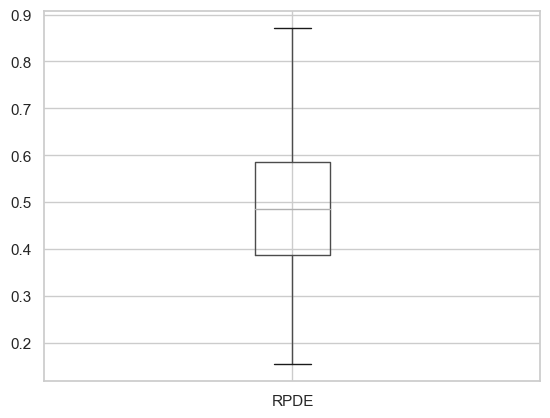

In [61]:
data.boxplot('RPDE')

<AxesSubplot:>

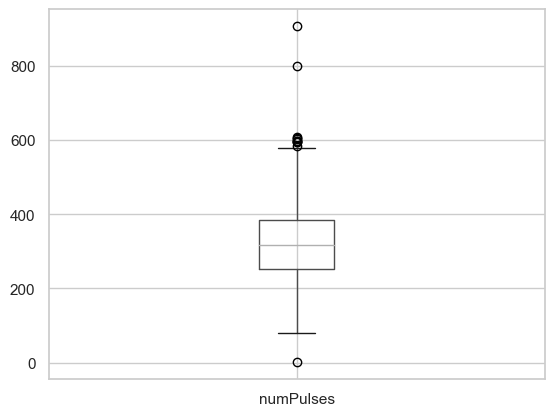

In [62]:
data.boxplot('numPulses')

<AxesSubplot:>

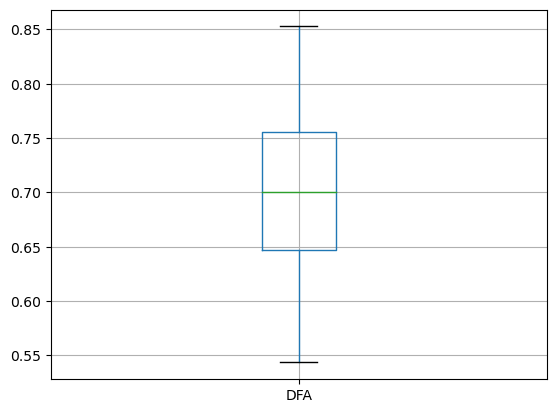

In [57]:
data.boxplot('DFA')

In [70]:
for x in ['DFA','RPDE','numPulses']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f'For {x} Min Outliers has {data.loc[data[x] < min,x].shape[0]} rows and Max has {data.loc[data[x] > max,x].shape[0] } rows')
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

data = data.dropna(axis = 0)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)    

For DFA Min Outliers has 0 rows and Max has 0 rows
For RPDE Min Outliers has 1 rows and Max has 4 rows
For numPulses Min Outliers has 0 rows and Max has 3 rows


In [71]:
for x in ['DFA','RPDE','numPulses']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f'For {x} Min Outliers has {data.loc[data[x] < min,x].shape[0]} rows and Max has {data.loc[data[x] > max,x].shape[0] } rows')

For DFA Min Outliers has 0 rows and Max has 0 rows
For RPDE Min Outliers has 0 rows and Max has 0 rows
For numPulses Min Outliers has 0 rows and Max has 0 rows


### 5) Feature Extraction

In [72]:
data

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0         1  0.85247  0.71826  0.57227      240.0             239.0   
1         1  0.76686  0.69481  0.53966      234.0             233.0   
2         1  0.85083  0.67604  0.58982      232.0             231.0   
3         0  0.41121  0.79672  0.59257      178.0             177.0   
4         0  0.32790  0.79782  0.53028      236.0             235.0   
..      ...      ...      ...      ...        ...               ...   
691       0  0.80903  0.56355  0.28385      417.0             416.0   
692       0  0.16084  0.56499  0.59194      415.0             413.0   
693       0  0.88389  0.72335  0.46815      381.0             380.0   
694       0  0.83782  0.74890  0.49823      340.0             339.0   
695       0  0.81304  0.76471  0.46374      340.0             339.0   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0            0.008064            0.000087       0.00218      0.000018   
1            0.008258            0.000073       0.00195      0.000016   
2            0.008340            0.000060       0.00176      0.000015   
3            0.010858            0.000183       0.00419      0.000046   
4            0.008162            0.002669       0.00535      0.000044   
..                ...                 ...           ...           ...   
691          0.004627            0.000052       0.00064      0.000003   
692          0.004550            0.000220       0.00143      0.000006   
693          0.005069            0.000103       0.00076      0.000004   
694          0.005679            0.000055       0.00092      0.000005   
695          0.005676            0.000037       0.00078      0.000004   

     rapJitter  ppq5Jitter  ddpJitter  locShimmer locDbShimmer  apq3Shimmer  \
0      0.00067     0.00129    0.00200     0.05883        0.517      0.03011   
1      0.00052     0.00112    0.00157     0.05516        0.502      0.02320   
2      0.00057     0.00111    0.00171     0.09902        0.897      0.05094   
3      0.00149     0.00268    0.00446     0.05451        0.527      0.02395   
4      0.00166     0.00227    0.00499     0.05610        0.497      0.02909   
..         ...         ...        ...         ...          ...          ...   
691    0.00008     0.00022    0.00024     0.01947        0.171      0.01068   
692    0.00016     0.00041    0.00047     0.04291        0.482      0.02307   
693    0.00011     0.00030    0.00034     0.02978        0.263      0.01597   
694    0.00017     0.00041    0.00052     0.03552        0.311      0.01791   
695    0.00014     0.00033    0.00042     0.03702        0.326      0.01940   

     apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
0        0.03496       0.04828     0.09034                 0.970805   
1        0.03675       0.06195     0.06961                 0.984322   
2        0.06497       0.07772     0.15282                 0.974846   
3        0.02857       0.04462     0.07185                 0.968343   
4        0.03327       0.05278     0.08728                 0.975754   
..           ...           ...         ...                      ...   
691      0.01260       0.01547     0.03204                 0.997438   
692      0.02626       0.03272     0.06920                 0.976867   
693      0.01916       0.02271     0.04790                 0.995544   
694      0.02348       0.02648     0.05373                 0.988241   
695      0.02332       0.02765     0.05820                 0.996402   

     meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
0                      0.036223                      18.995     69.997496   
1                      0.017974                      21.497     67.415903   
2                      0.026313                      17.651     62.661706   
3                      0.042003                      19.865     76.306989   
4                      0.027139                      19.557     76.645686   
..         

In [76]:
int(0.5)

0

In [93]:


def CalculatingSignalType(Mean,Std,Pct,Abs) : 
    Result =  ((float(Mean) * 5) + (float(Std)*17) - (float(Pct)*3)) / (float(Abs)+0.6)
    if Result < 0.05 : 
        return 'Weak'
    elif Result < 0.1 : 
        return 'Medium'
    else : 
        return 'Strong'


data['SignalType'] = data.apply(lambda x : CalculatingSignalType(
                                                                x['meanPeriodPulses'],
                                                                x['stdDevPeriodPulses'],
                                                                x['locPctJitter'],
                                                                x['locAbsJitter'])   ,axis=1  )

In [94]:
data['SignalType'].value_counts()

Weak      386
Medium    271
Strong     39
Name: SignalType, dtype: int64

In [96]:
# wrong example
data['SignalType'] = data['SignalType'].replace({'weak':0,'Medium':1,'Strong':2,'Python':3})
data['SignalType'].value_counts()

Weak    386
1       271
2        39
Name: SignalType, dtype: int64

In [97]:
data['SignalType'] = data['SignalType'].replace({'Weak':0,'Medium':1,'Strong':2})
data['SignalType'].value_counts()

0    386
1    271
2     39
Name: SignalType, dtype: int64

### 6) Feature Selection

In [91]:
data.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_std

In [103]:
data['class'].value_counts()

1    524
0    172
Name: class, dtype: int64

In [133]:
X = data.drop(['class'],axis=1)
y = data['class']

In [135]:
FeatureSelection = SelectPercentile(score_func = f_classif, percentile=13.2) 
X_Selected = FeatureSelection.fit_transform(X, y)
NewData = pd.DataFrame(X_Selected,columns = [i for i,j in zip(X.columns,FeatureSelection.get_support()) if j])
NewData

,DFA,f1,mean_MFCC_2nd_coef,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_7_coef,app_TKEO_std_8_coef,app_TKEO_std_9_coef,app_TKEO_std_10_coef,tqwt_energy_dec_11,tqwt_energy_dec_12,tqwt_energy_dec_13,tqwt_energy_dec_14,tqwt_energy_dec_15,tqwt_entropy_shannon_dec_9,tqwt_entropy_shannon_dec_10,tqwt_entropy_shannon_dec_11,tqwt_entropy_shannon_dec_12,tqwt_entropy_shannon_dec_13,tqwt_entropy_shannon_dec_14,tqwt_entropy_shannon_dec_15,tqwt_entropy_shannon_dec_16,tqwt_entropy_shannon_dec_17,tqwt_entropy_log_dec_7,tqwt_entropy_log_dec_8,tqwt_entropy_log_dec_9,tqwt_entropy_log_dec_10,tqwt_entropy_log_dec_11,tqwt_entropy_log_dec_12,tqwt_entropy_log_dec_13,tqwt_entropy_log_dec_14,tqwt_entropy_log_dec_15,tqwt_entropy_log_dec_16,tqwt_entropy_log_dec_17,tqwt_entropy_log_dec_34,tqwt_entropy_log_dec_35,tqwt_TKEO_mean_dec_11,tqwt_TKEO_mean_dec_15,tqwt_TKEO_std_dec_10,tqwt_TKEO_std_dec_11,tqwt_TKEO_std_dec_12,tqwt_TKEO_std_dec_13,tqwt_TKEO_std_dec_14,tqwt_TKEO_std_dec_15,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9,tqwt_stdValue_dec_10,tqwt_stdValue_dec_11,tqwt_stdValue_dec_12,tqwt_stdValue_dec_13,tqwt_stdValue_dec_14,tqwt_stdValue_dec_15,tqwt_stdValue_dec_16,tqwt_minValue_dec_10,tqwt_minValue_dec_11,tqwt_minValue_dec_12,tqwt_minValue_dec_13,tqwt_minValue_dec_14,tqwt_minValue_dec_15,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_36
0,0.71826,539.342735,2.48740,0.060808,0.030284,0.028830,0.042253,0.028115,0.047180,0.035775,0.020827,0.023057,0.016392,0.029594,0.015351,0.014642,0.019681,0.012829,0.021703,0.017089,0.010043,0.012130,-4.150578e+07,-5.499127e+07,-7.977922e+07,-129684181.7,-232253303.7,-4.590581e+08,-9.021184e+08,-1.886559e+09,-3.937753e+09,115701.9285,245931.5887,5.248001e+05,1.049747e+06,2101636.245,6.720895e+05,1381934.183,2777808.879,5.547195e+06,0.000415,0.000239,0.001905,0.012066,0.029439,4.6877,4.8635,4.8840,2.8180,18.8625,89.7525,174.6920,189.5000,360.7126,-560498.2903,-432705.1970,-352797.2473,-281439.2690,-229943.2967,-201985.0408,-127736.2777,-83962.4084,-62201.7084,-52209.7866,-34671.0477,-3726.2679,-3190.1752,0.000050,0.006919,0.000059,0.000074,0.000059,0.000190,0.001292,0.006532,0.002268,0.003767,0.004215,0.004697,0.005199,0.004324,0.013373,0.036869,0.063087,0.078064,-0.024160,-0.026321,-0.024286,-0.048924,-0.108390,-0.19432,0.025222,0.022796,0.024286,0.048924,0.105750,2.1550,1.6058,1.5466,18.9405
1,0.69481,564.363615,2.89860,0.076312,0.025376,0.050259,0.037071,0.022166,0.039071,0.030383,0.032360,0.032486,0.014222,0.038709,0.012191,0.025500,0.019374,0.010645,0.020296,0.015389,0.015488,0.016128,-3.932956e+07,-5.216745e+07,-7.573630e+07,-123243056.6,-220947833.1,-4.370117e+08,-8.590387e+08,-1.796706e+09,-3.750669e+09,111142.9462,236033.1031,5.028993e+05,1.005893e+06,2012043.365,6.427345e+05,1327168.357,2654568.330,5.309695e+06,0.000515,0.000297,0.001640,0.010578,0.028460,3.9585,4.3621,4.8483,2.7101,13.3847,65.9794,140.8136,163.4516,367.5642,-593534.8933,-453059.1897,-359075.8955,-285733.2255,-230526.8175,-203389.4678,-136442.1326,-90311.3160,-66006.9965,-53505.5568,-33182.7497,-3719.5566,-3106.4317,0.000051,0.005374,0.000081,0.000120,0.000169,0.000301,0.001185,0.005864,0.001530,0.002911,0.003

In [137]:
FeatureSelection = SelectKBest(score_func= f_classif ,k=100)
X_Selected = FeatureSelection.fit_transform(X, y)
NewData = pd.DataFrame(X_Selected,columns = [i for i,j in zip(X.columns,FeatureSelection.get_support()) if j])
NewData

,DFA,f1,mean_MFCC_2nd_coef,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_7_coef,app_TKEO_std_8_coef,app_TKEO_std_9_coef,app_TKEO_std_10_coef,tqwt_energy_dec_11,tqwt_energy_dec_12,tqwt_energy_dec_13,tqwt_energy_dec_14,tqwt_energy_dec_15,tqwt_entropy_shannon_dec_9,tqwt_entropy_shannon_dec_10,tqwt_entropy_shannon_dec_11,tqwt_entropy_shannon_dec_12,tqwt_entropy_shannon_dec_13,tqwt_entropy_shannon_dec_14,tqwt_entropy_shannon_dec_15,tqwt_entropy_shannon_dec_16,tqwt_entropy_shannon_dec_17,tqwt_entropy_log_dec_7,tqwt_entropy_log_dec_8,tqwt_entropy_log_dec_9,tqwt_entropy_log_dec_10,tqwt_entropy_log_dec_11,tqwt_entropy_log_dec_12,tqwt_entropy_log_dec_13,tqwt_entropy_log_dec_14,tqwt_entropy_log_dec_15,tqwt_entropy_log_dec_16,tqwt_entropy_log_dec_17,tqwt_entropy_log_dec_34,tqwt_entropy_log_dec_35,tqwt_TKEO_mean_dec_11,tqwt_TKEO_mean_dec_15,tqwt_TKEO_std_dec_10,tqwt_TKEO_std_dec_11,tqwt_TKEO_std_dec_12,tqwt_TKEO_std_dec_13,tqwt_TKEO_std_dec_14,tqwt_TKEO_std_dec_15,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9,tqwt_stdValue_dec_10,tqwt_stdValue_dec_11,tqwt_stdValue_dec_12,tqwt_stdValue_dec_13,tqwt_stdValue_dec_14,tqwt_stdValue_dec_15,tqwt_stdValue_dec_16,tqwt_minValue_dec_10,tqwt_minValue_dec_11,tqwt_minValue_dec_12,tqwt_minValue_dec_13,tqwt_minValue_dec_14,tqwt_minValue_dec_15,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_36
0,0.71826,539.342735,2.48740,0.060808,0.030284,0.028830,0.042253,0.028115,0.047180,0.035775,0.020827,0.023057,0.016392,0.029594,0.015351,0.014642,0.019681,0.012829,0.021703,0.017089,0.010043,0.012130,-4.150578e+07,-5.499127e+07,-7.977922e+07,-129684181.7,-232253303.7,-4.590581e+08,-9.021184e+08,-1.886559e+09,-3.937753e+09,115701.9285,245931.5887,5.248001e+05,1.049747e+06,2101636.245,6.720895e+05,1381934.183,2777808.879,5.547195e+06,0.000415,0.000239,0.001905,0.012066,0.029439,4.6877,4.8635,4.8840,2.8180,18.8625,89.7525,174.6920,189.5000,360.7126,-560498.2903,-432705.1970,-352797.2473,-281439.2690,-229943.2967,-201985.0408,-127736.2777,-83962.4084,-62201.7084,-52209.7866,-34671.0477,-3726.2679,-3190.1752,0.000050,0.006919,0.000059,0.000074,0.000059,0.000190,0.001292,0.006532,0.002268,0.003767,0.004215,0.004697,0.005199,0.004324,0.013373,0.036869,0.063087,0.078064,-0.024160,-0.026321,-0.024286,-0.048924,-0.108390,-0.19432,0.025222,0.022796,0.024286,0.048924,0.105750,2.1550,1.6058,1.5466,18.9405
1,0.69481,564.363615,2.89860,0.076312,0.025376,0.050259,0.037071,0.022166,0.039071,0.030383,0.032360,0.032486,0.014222,0.038709,0.012191,0.025500,0.019374,0.010645,0.020296,0.015389,0.015488,0.016128,-3.932956e+07,-5.216745e+07,-7.573630e+07,-123243056.6,-220947833.1,-4.370117e+08,-8.590387e+08,-1.796706e+09,-3.750669e+09,111142.9462,236033.1031,5.028993e+05,1.005893e+06,2012043.365,6.427345e+05,1327168.357,2654568.330,5.309695e+06,0.000515,0.000297,0.001640,0.010578,0.028460,3.9585,4.3621,4.8483,2.7101,13.3847,65.9794,140.8136,163.4516,367.5642,-593534.8933,-453059.1897,-359075.8955,-285733.2255,-230526.8175,-203389.4678,-136442.1326,-90311.3160,-66006.9965,-53505.5568,-33182.7497,-3719.5566,-3106.4317,0.000051,0.005374,0.000081,0.000120,0.000169,0.000301,0.001185,0.005864,0.001530,0.002911,0.003

In [138]:
NewData['class'] = y
NewData

,DFA,f1,mean_MFCC_2nd_coef,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_7_coef,app_TKEO_std_8_coef,app_TKEO_std_9_coef,app_TKEO_std_10_coef,tqwt_energy_dec_11,tqwt_energy_dec_12,tqwt_energy_dec_13,tqwt_energy_dec_14,tqwt_energy_dec_15,tqwt_entropy_shannon_dec_9,tqwt_entropy_shannon_dec_10,tqwt_entropy_shannon_dec_11,tqwt_entropy_shannon_dec_12,tqwt_entropy_shannon_dec_13,tqwt_entropy_shannon_dec_14,tqwt_entropy_shannon_dec_15,tqwt_entropy_shannon_dec_16,tqwt_entropy_shannon_dec_17,tqwt_entropy_log_dec_7,tqwt_entropy_log_dec_8,tqwt_entropy_log_dec_9,tqwt_entropy_log_dec_10,tqwt_entropy_log_dec_11,tqwt_entropy_log_dec_12,tqwt_entropy_log_dec_13,tqwt_entropy_log_dec_14,tqwt_entropy_log_dec_15,tqwt_entropy_log_dec_16,tqwt_entropy_log_dec_17,tqwt_entropy_log_dec_34,tqwt_entropy_log_dec_35,tqwt_TKEO_mean_dec_11,tqwt_TKEO_mean_dec_15,tqwt_TKEO_std_dec_10,tqwt_TKEO_std_dec_11,tqwt_TKEO_std_dec_12,tqwt_TKEO_std_dec_13,tqwt_TKEO_std_dec_14,tqwt_TKEO_std_dec_15,tqwt_stdValue_dec_7,tqwt_stdValue_dec_8,tqwt_stdValue_dec_9,tqwt_stdValue_dec_10,tqwt_stdValue_dec_11,tqwt_stdValue_dec_12,tqwt_stdValue_dec_13,tqwt_stdValue_dec_14,tqwt_stdValue_dec_15,tqwt_stdValue_dec_16,tqwt_minValue_dec_10,tqwt_minValue_dec_11,tqwt_minValue_dec_12,tqwt_minValue_dec_13,tqwt_minValue_dec_14,tqwt_minValue_dec_15,tqwt_maxValue_dec_10,tqwt_maxValue_dec_11,tqwt_maxValue_dec_12,tqwt_maxValue_dec_13,tqwt_maxValue_dec_14,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_36,class
0,0.71826,539.342735,2.48740,0.060808,0.030284,0.028830,0.042253,0.028115,0.047180,0.035775,0.020827,0.023057,0.016392,0.029594,0.015351,0.014642,0.019681,0.012829,0.021703,0.017089,0.010043,0.012130,-4.150578e+07,-5.499127e+07,-7.977922e+07,-129684181.7,-232253303.7,-4.590581e+08,-9.021184e+08,-1.886559e+09,-3.937753e+09,115701.9285,245931.5887,5.248001e+05,1.049747e+06,2101636.245,6.720895e+05,1381934.183,2777808.879,5.547195e+06,0.000415,0.000239,0.001905,0.012066,0.029439,4.6877,4.8635,4.8840,2.8180,18.8625,89.7525,174.6920,189.5000,360.7126,-560498.2903,-432705.1970,-352797.2473,-281439.2690,-229943.2967,-201985.0408,-127736.2777,-83962.4084,-62201.7084,-52209.7866,-34671.0477,-3726.2679,-3190.1752,0.000050,0.006919,0.000059,0.000074,0.000059,0.000190,0.001292,0.006532,0.002268,0.003767,0.004215,0.004697,0.005199,0.004324,0.013373,0.036869,0.063087,0.078064,-0.024160,-0.026321,-0.024286,-0.048924,-0.108390,-0.19432,0.025222,0.022796,0.024286,0.048924,0.105750,2.1550,1.6058,1.5466,18.9405,1
1,0.69481,564.363615,2.89860,0.076312,0.025376,0.050259,0.037071,0.022166,0.039071,0.030383,0.032360,0.032486,0.014222,0.038709,0.012191,0.025500,0.019374,0.010645,0.020296,0.015389,0.015488,0.016128,-3.932956e+07,-5.216745e+07,-7.573630e+07,-123243056.6,-220947833.1,-4.370117e+08,-8.590387e+08,-1.796706e+09,-3.750669e+09,111142.9462,236033.1031,5.028993e+05,1.005893e+06,2012043.365,6.427345e+05,1327168.357,2654568.330,5.309695e+06,0.000515,0.000297,0.001640,0.010578,0.028460,3.9585,4.3621,4.8483,2.7101,13.3847,65.9794,140.8136,163.4516,367.5642,-593534.8933,-453059.1897,-359075.8955,-285733.2255,-230526.8175,-203389.4678,-136442.1326,-90311.3160,-66006.9965,-53505.5568,-33182.7497,-3719.5566,-3106.4317,0.000051,0.005374,0.000081,0.000120,0.000169,0.000301,0.001185,0.005864,0.001530,0.0029

In [139]:
NewData.to_csv('SmallData.csv')